#EE 240 hw2 Ziyan Zhang, SID: 862468175



## H2.1

### (a)

second derivative of f(w) w.r.t w: \
$f(W)= log(1+e^{-W^TX})$ \
set:
\begin{aligned}
h_{\mathbf{w}}\left(\mathbf{x}_i\right) & =\frac{1}{1+e^{-\mathbf{w}^T \mathbf{x}_i}} \end{aligned}
with chian rule: \
\begin{aligned}
\frac{\partial h_{\mathbf{w}}\left(\mathbf{x}_i\right)}{\partial \mathbf{w}(k)} & =h_{\mathbf{w}}\left(\mathbf{x}_i\right)\left(1-h_{\mathbf{w}}\left(\mathbf{x}_i\right)\right) \mathbf{x}_i(k)
\end{aligned}

\begin{aligned}
f(\mathbf{w}) = -log(h_{\mathbf{w}}\left(\mathbf{x}_i\right)),
\frac{\partial f(\mathbf{w})}{\partial \mathbf{w}(k)} = \mathbf{x}_i(k)(h_{\mathbf{w}}\left(\mathbf{x}_i\right)-1)
\end{aligned}

So, \
\begin{aligned}
\frac{\partial^2 f(\mathbf{w})}{\partial \mathbf{w}(k)} = h_{\mathbf{w}}\left(\mathbf{x}_i\right)\left(1-h_{\mathbf{w}}\left(\mathbf{x}_i\right)\right) \mathbf{x}_i^2(k)
\end{aligned}

Because $h_{\mathbf{w}}\left(\mathbf{x}_i\right)$ is between 0-1, so the derivative of f(w) is always positive.



### (b)

In [ ]:
import numpy as np
import math
# code for question b
from sklearn.datasets import fetch_openml
# load data
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# note that images are stored as rows in the data array (70000,784)
print(X.shape)
print(y.shape)
# split data into training and testing set
train_x = X[0:60000,:]
train_y = y[0:60000]
test_x = X[60000:70000,:]
test_y = y[60000:70000]

#Then choose the data corresponding to digits "0" and "1".
# Choose only two digits
class_0 = '3'
class_1 = '1'
X0 = train_x[train_y==class_0,:]
X1 = train_x[train_y==class_1,:]
y0 = np.zeros(X0.shape[0],int)
y1 = np.ones(X1.shape[0],int)

train_x = np.concatenate((X0,X1),axis=0)
train_y = np.concatenate((y0,y1),axis=0)
print('Number of training samples is {0} with {1} labels 0 and {2} labels 1'.format(train_x.shape[0],y0.shape[0],y1.shape[0]))
X0 = test_x[test_y==class_0,:]
X1 = test_x[test_y==class_1,:]
y0 = np.zeros(X0.shape[0],int)
y1 = np.ones(X1.shape[0],int)
test_x = np.concatenate((X0,X1),axis=0)
test_y = np.concatenate((y0,y1),axis=0)
print('Number of test samples is {0} with {1} labels 0 and {2} labels 1'.format(test_x.shape[0],y0.shape[0],y1.shape[0]))
# After that you need to append 1 before the feature vectors.
# append 1 for the constant term b (remember our model is w^T x + b)
train_x = np.insert(train_x,0,1,axis = 1)
test_x = np.insert(test_x,0,1,axis = 1)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000,)
Number of training samples is 12873 with 6131 labels 0 and 6742 labels 1
Number of test samples is 2145 with 1010 labels 0 and 1135 labels 1


In [ ]:
# Then write your codes for logistic regression.
# Define a sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))
sigmoid_vec = np.vectorize(sigmoid)
# Define the gradient function
alpha = 0.01
h = np.ones(len(train_x))
def grad(w, x, y):
  for i in range(len(x)):
    h[i] = 1/(1+np.exp(-w.T@x[i]))
  w = w + alpha*x.T@(y-h)
  return w, h
# Write your code for logistic regression
tmp = np.ones(len(train_x))
def minfunc(w,x,y):
  for i in range(len(x)):
    tmp[i] = y[i]*math.log(1+np.exp(-w.T@x[i]))+(1-y[i])*math.log(1+np.exp(w.T@x[i]))
  r = sum(tmp)
  return r
# with gradient descent with a fixed step size
def gradient_decs(n,x,y):
    r_collection = []
    w = np.zeros(785)
    r1 = minfunc(w,x,y)
    for i in range(n):
        w, h = grad(w,x,y)
        r2 = minfunc(w,x,y)
        if r1 - r2 < 1e-3:
            return w, r2
        if r2 < r1:
            r1 = r2
        r_collection.append(r2)
    return w, r_collection, h

# w is the output of logistic regression (includes weights and constant term)
# length of w for MNIST case will be 785
w, r_collection, h = gradient_decs(100,train_x,train_y)
predict = np.round(sigmoid_vec(np.matmul(test_x.astype(float),w)))
acc =100.0*np.sum(test_y == predict)/test_y.shape[0]
print(acc)

<ipython-input-100-425cf31bc1d2>:18: RuntimeWarning: overflow encountered in exp
  tmp[i] = y[i]*math.log(1+np.exp(-w.T@x[i]))+(1-y[i])*math.log(1+np.exp(w.T@x[i]))
<ipython-input-100-425cf31bc1d2>:18: RuntimeWarning: invalid value encountered in multiply
  tmp[i] = y[i]*math.log(1+np.exp(-w.T@x[i]))+(1-y[i])*math.log(1+np.exp(w.T@x[i]))
<ipython-input-100-425cf31bc1d2>:11: RuntimeWarning: overflow encountered in exp
  h[i] = 1/(1+np.exp(-w.T@x[i]))


99.39393939393939
[0. 0. 0. ... 1. 1. 1.]


<ipython-input-100-425cf31bc1d2>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


The accuracy of classification is 99.39\%.

## H2.2

### (a)

In [ ]:
# generate two datasets Data1 and Data2
import random
import numpy as np
def coordinate_generation():
  coordinates = np.array([1,1])
  for i in range(100):
    x = random.randint(0,100) #randomly generated, so no need to randomly select training and testing dataset
    y = random.randint(0,100)
    coordinates = np.vstack((coordinates, [x,y]))
  coordinates = coordinates[1:,:]
  return coordinates

Data1 = coordinate_generation()
Data2 = coordinate_generation()
Data1 = np.insert(Data1, 0, 1, axis = 1)
Data2 = np.insert(Data1, 0, 1, axis = 1)

In [ ]:
# generate w and b, assign labels
w1 = [-100, 1, 1]
w1 = np.array(w1)
y1 = np.sign(Data1@w1)
w2 = [-90, 0.8, 1]
w2 = np.array(w1)
y2 = np.sign(Data1@w2)
train_x1 = Data1[:80,:]
train_y1 = y1[:80]
test_x1 = Data1[80:,:]
test_y1 = y1[80:]
train_x2 = Data1[:30,:]
train_y2 = y1[:30]
test_x2 = Data1[30:,:]
test_y2 = y1[30:]

### (b)

In [ ]:
# Implementation PLA
def predict(w,x):
    if np.sign(w.T@x)==0.0:
      ypre = 1.0
    else:
      ypre = np.sign(w.T@x)
    return ypre
def grad_pla(x,y):
  w = np.zeros(3)
  #w[0] = -100
  for i in range(10000):
    error = 0
    for j in range(len(y)):
      ypre = predict(w,x[j])
      w = w + (1/2)*(y[j]-ypre)*x[j]
    for k in range(len(y)):
      if predict(w,x[k]) != y[k]:
        error += 1
    if error == 0:
      break
  return w, error, i

### (c)

In [ ]:
#training
w1_grad, error1, num1 = grad_pla(train_x1, train_y1)
w2_grad, error2, num2 = grad_pla(train_x2, train_y2)


In [ ]:
print(w1_grad)
print(w2_grad)
print(error1)
print(error2)
print(num1)
print(num2)

[-3901.    38.    40.]
[-4409.    47.    41.]
0
0
475
1271


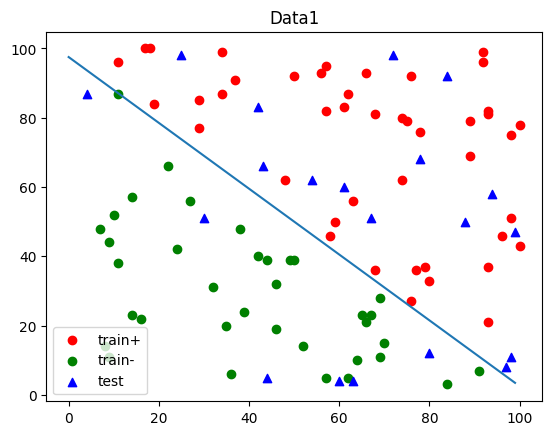

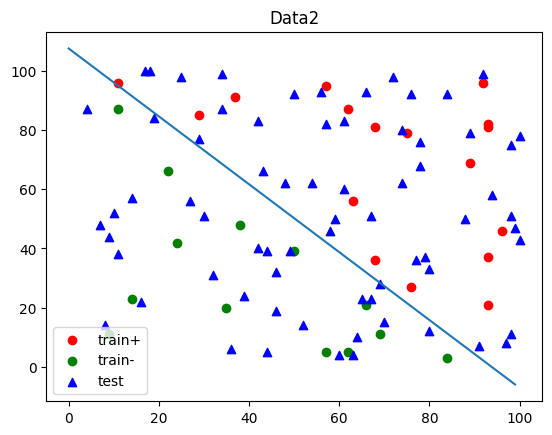

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
#Data1
x1_px, x1_py, x1_nx, x1_ny = [], [], [], []
for i in range(len(train_y1)):
  if train_y1[i]==1:
    x1_px.append(train_x1[i,1])
    x1_py.append(train_x1[i,2])
  else:
    x1_nx.append(train_x1[i,1])
    x1_ny.append(train_x1[i,2])
x_line = np.arange(0,100,1)
y_line = -(w1_grad[1]/w1_grad[2])*x_line-(w1_grad[0]/w1_grad[2])

plt.scatter(x1_px, x1_py, color = 'red')
plt.scatter(x1_nx, x1_ny, color = 'green')
plt.scatter(test_x1[:,1], test_x1[:,2], color = 'blue', marker = '^')
plt.legend(['train+', 'train-', 'test'])
plt.plot(x_line, y_line,'-')
plt.title('Data1')
plt.show()
#Data2
x2_px, x2_py, x2_nx, x2_ny = [], [], [], []
for i in range(len(train_y2)):
  if train_y2[i]==1:
    x2_px.append(train_x2[i,1])
    x2_py.append(train_x2[i,2])
  else:
    x2_nx.append(train_x2[i,1])
    x2_ny.append(train_x2[i,2])
x2_line = np.arange(0,100,1)
y2_line = -(w2_grad[1]/w2_grad[2])*x2_line-(w2_grad[0]/w2_grad[2])

plt.scatter(x2_px, x2_py, color = 'red')
plt.scatter(x2_nx, x2_ny, color = 'green')
plt.scatter(test_x2[:,1], test_x2[:,2], color = 'blue', marker = '^')
plt.legend(['train+', 'train-', 'test'])
plt.plot(x2_line, y2_line,'-')
plt.title('Data2')
plt.show()

### (d)

In [ ]:
#testing
#Data1
tp1, fn1, fp1 = 0, 0, 0
for i in range(len(test_x1)):
  ypre1 = predict(w1_grad, test_x1[i])
  if ypre1 == test_y1[i] and ypre1 == 1:
    tp1+=1
  if ypre1 != test_y1[i] and ypre1 == 1:
    fp1+=1
  if ypre1 != test_y1[i] and ypre1 == -1:
    fn1+=1

#Data2
tp2, fn2, fp2 = 0, 0, 0
for i in range(len(test_x2)):
  ypre2 = predict(w2_grad, test_x2[i])
  if ypre2 == test_y2[i] and ypre2 == 1:
    tp2+=1
  if ypre2 != test_y2[i] and ypre2 == 1:
    fp2+=1
  if ypre2 != test_y2[i] and ypre2 == -1:
    fn2+=1
# precision, recall, f1-score
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
f1score1 = 2*precision1*recall1/(precision1+recall1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
f1score2 = 2*precision2*recall2/(precision2+recall2)

In [ ]:
print(precision1, recall1, f1score1, precision2, recall2, f1score2)

1.0 1.0 1.0 0.975609756097561 0.975609756097561 0.975609756097561


### (e)

In [ ]:
# Implementation kernal PLA
def predictk(w,x):
    if np.sign(w.T@x)==0.0:
      ypre = 1.0
    else:
      ypre = np.sign(w.T@x)
    return ypre
def grad_kpla(x,y):
  alpha = np.zeros((len(y),1))
  y = y.reshape(len(y),1)
  for i in range(10000):
    error = 0
    for j in range(len(y)):
      w = sum(alpha*y*x)
      ypre = predictk(w,x[j])
      if ypre != y[j]:
        alpha[j] = alpha[j] + 1
    for k in range(len(y)):
      if predictk(w,x[k]) != y[k]:
        error += 1
    if error == 0:
      break
  return w, error, i
#training
w1_kgrad, kerror1, knum1 = grad_kpla(train_x1, train_y1)
w2_kgrad, kerror2, knum2 = grad_kpla(train_x2, train_y2)

In [ ]:
print(w1_kgrad)
print(w2_kgrad)
print(kerror1)
print(kerror2)
print(knum1)
print(knum2)

[-3901.    38.    40.]
[-4409.    47.    41.]
0
0
475
1271


As can be seen, the results are all the same as in (c), including the w vector, the error rate, and the number of iteration.

## H2.3

### (a)

1. Sample 1: x = [-1, -1]\
   $
   \phi(x) = \begin{bmatrix}
   -\sqrt{2} \\
   -\sqrt{2} \\
   1 \\
   1 \\
   \sqrt{2} \\
   1
   \end{bmatrix}
   $

2. Sample 2: x = [-1, 1]\
   $
   \phi(x) = \begin{bmatrix}
   -\sqrt{2} \\
   \sqrt{2} \\
   1 \\
   1 \\
   -\sqrt{2} \\
   1
   \end{bmatrix}
   $

3. Sample 3: x = [1, -1]\
   $
   \phi(x) = \begin{bmatrix}
   \sqrt{2} \\
   -\sqrt{2} \\
   1 \\
   1 \\
   -\sqrt{2} \\
   1
   \end{bmatrix}
   $

4. Sample 4: x = [1, 1]\
   $
   \phi(x) = \begin{bmatrix}
   \sqrt{2} \\
   \sqrt{2} \\
   1 \\
   1 \\
   \sqrt{2} \\
   1
   \end{bmatrix}
   $


If we use x(5)=0 as the plane to seperate the samples, it will work. So, the feature vectors are seperable in 5D space.

### (b)

In [54]:
#compute G matrix
import numpy as np
fai = np.zeros((4,6))
fai[0] = [-pow(2,0.5), -pow(2,0.5), 1, 1, pow(2,0.5), 1]
fai[1] = [-pow(2,0.5), pow(2,0.5), 1, 1, -pow(2,0.5), 1]
fai[2] = [pow(2,0.5), -pow(2,0.5), 1, 1, -pow(2,0.5), 1]
fai[3] = [pow(2,0.5), pow(2,0.5), 1, 1, pow(2,0.5), 1]
y = np.zeros(4)
y[0] = 1
y[1] = -1
y[2] = -1
y[3] = 1
G = np.zeros((4,4))
for i in range(4):
  for j in range(4):
    G[i,j] = y[i]*y[j]*fai[i].T@fai[j]
G

array([[ 9., -1., -1.,  1.],
       [-1.,  9.,  1., -1.],
       [-1.,  1.,  9., -1.],
       [ 1., -1., -1.,  9.]])

In [86]:
def loss(G, alpha):
  r = -(1/2)*alpha.T@G@alpha+sum(alpha)
  return r

constraint_matrix = np.expand_dims(y, axis=0)
constraint_value = 0.0

alpha = np.linalg.solve(G, np.ones(4))
alpha -= np.mean(alpha * y)

print("alpha:", alpha)
print("value:", loss(G, alpha))

alpha: [0.125 0.125 0.125 0.125]
value: 0.25


### (c)

In [90]:
print(alpha>=0)
a = y*alpha
np.isclose((alpha.T@y), 0)

[ True  True  True  True]


True

### (d)

[-5.55111512e-17 -5.55111512e-17  2.77555756e-17  2.77555756e-17
  7.07106781e-01  2.77555756e-17]
[ 1. -1. -1.  1.]


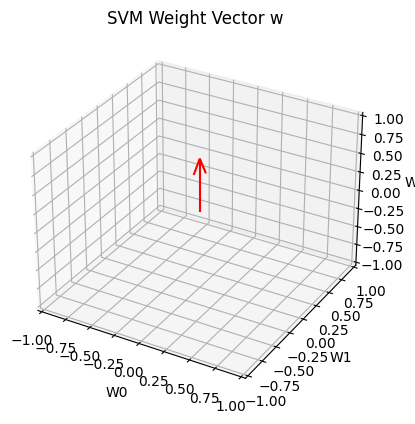

In [106]:
alpha = alpha.reshape(4,1)
y = y.reshape(4,1)
w = sum(alpha*y*fai)
print(w)
h = w@fai.T
print(h)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# w[0], w[1], w[4] is the vectors with fluctuating fai[x]
ax.quiver(0, 0, 0, w[0], w[1], w[4], color='r')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_xlabel('W0')
ax.set_ylabel('W1')
ax.set_zlabel('W4')
ax.set_title('SVM Weight Vector w')

plt.show()

## H2.4

### (a)

In [1]:
from sklearn.datasets import fetch_openml
# mnist = fetch_openml(’mnist_784’)
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import random

X4 = X[y=='4',:]
X9 = X[y=='9',:]

#train
train_x4 = X4[:4000,:]/255
train_y4 = np.zeros(4000)
train_x9 = X9[:4000,:]/255
train_y9 = np.ones(4000)
train_x = np.concatenate((train_x4, train_x9), axis = 0)
train_y = np.concatenate((train_y4, train_y9), axis = 0)

#test
test_x4 = X4[4000:,:]/255
test_y4 = -np.zeros(len(test_x4[:,1]))
test_x9 = X9[4000:,:]/255
test_y9 = np.ones(len(test_x9[:,1]))
test_x = np.concatenate((test_x4, test_x9), axis = 0)
test_y = np.concatenate((test_y4, test_y9), axis = 0)

index = [i for i in range(len(train_y))]
random.shuffle(index)
train_x = train_x[index]
train_y = train_y[index]
index = [i for i in range(len(test_y))]
random.shuffle(index)
test_x = test_x[index]
test_y = test_y[index]


#holdout
holdfirst_x, holdout_x, holdfirst_y, holdout_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

poly kernal, degree = 1

In [7]:
from sklearn import svm

for C in C_values:
  clf = svm.SVC(C=C,kernel='poly', degree = 1)
  clf.fit(holdfirst_x,holdfirst_y)
  Pe = 1 - clf.score(holdout_x,holdout_y)
  print(f'C = {C}, Pe = {Pe}')

C = 0.001, Pe = 0.5293749999999999
C = 0.01, Pe = 0.07625000000000004
C = 0.1, Pe = 0.04625000000000001
C = 1, Pe = 0.03562500000000002
C = 10, Pe = 0.03500000000000003
C = 100, Pe = 0.041874999999999996
C = 1000, Pe = 0.04812499999999997


Best C is 10.

In [8]:
  #final test error
  clf = svm.SVC(C=10,kernel='poly', degree = 1)
  clf.fit(train_x,train_y)
  Pe = 1 - clf.score(test_x,test_y)
  print(f'test error is {Pe}')

test error is 0.03216879972327913


In [9]:
#number of datapoints are support vectors
numsv1 = clf.support_vectors_.shape[0]
numsv1

775

poly kernal, degree = 2

In [11]:
for C in C_values:
  clf = svm.SVC(C=C,kernel='poly', degree = 2)
  clf.fit(holdfirst_x,holdfirst_y)
  Pe = 1 - clf.score(holdout_x,holdout_y)
  print(f'C = {C}, Pe = {Pe}')


C = 0.001, Pe = 0.52125
C = 0.01, Pe = 0.05625000000000002
C = 0.1, Pe = 0.02937500000000004
C = 1, Pe = 0.016249999999999987
C = 10, Pe = 0.010624999999999996
C = 100, Pe = 0.012499999999999956
C = 1000, Pe = 0.012499999999999956


Best C is 10

In [13]:
#final test error
clf = svm.SVC(C=10,kernel='poly', degree = 2)
clf.fit(train_x,train_y)
Pe = 1 - clf.score(test_x,test_y)
print(f'test error is {Pe}')

#number of datapoints are support vectors
numsv2 = clf.support_vectors_.shape[0]
numsv2

test error is 0.011760636457972984


699

### (b)

In [3]:
#RBF
from sklearn import svm
C_values = [0.01, 0.1, 1, 10, 100, 1000]
gamma_values = [0.01, 0.03, 0.05, 0.08, 0.1, 0.5]
Pe_min, C_best, gamma_best = 1, None, None
for C in C_values:
  for gamma in gamma_values:
    clf = svm.SVC(C=C, kernel='rbf', gamma = gamma)
    clf.fit(holdfirst_x,holdfirst_y)
    Pe = 1 - clf.score(holdout_x,holdout_y)
    print(f'C = {C}, Pe = {Pe}, gamma = {gamma}')
    if Pe < Pe_min:
      Pe_min = Pe
      C_best = C
      gamma_best = gamma
print(f'best paras: C {C_best}, gamma {gamma_best}, Pe {Pe_min}')

C = 0.01, Pe = 0.07125000000000004, gamma = 0.01
C = 0.01, Pe = 0.09062499999999996, gamma = 0.03
C = 0.01, Pe = 0.16000000000000003, gamma = 0.05
C = 0.01, Pe = 0.51, gamma = 0.08
C = 0.01, Pe = 0.51, gamma = 0.1
C = 0.01, Pe = 0.51, gamma = 0.5
C = 0.1, Pe = 0.034375000000000044, gamma = 0.01
C = 0.1, Pe = 0.02375000000000005, gamma = 0.03
C = 0.1, Pe = 0.03874999999999995, gamma = 0.05
C = 0.1, Pe = 0.11062499999999997, gamma = 0.08
C = 0.1, Pe = 0.1725, gamma = 0.1
C = 0.1, Pe = 0.51, gamma = 0.5
C = 1, Pe = 0.020000000000000018, gamma = 0.01
C = 1, Pe = 0.011249999999999982, gamma = 0.03
C = 1, Pe = 0.010624999999999996, gamma = 0.05
C = 1, Pe = 0.02312499999999995, gamma = 0.08
C = 1, Pe = 0.03937500000000005, gamma = 0.1
C = 1, Pe = 0.474375, gamma = 0.5
C = 10, Pe = 0.012499999999999956, gamma = 0.01
C = 10, Pe = 0.008750000000000036, gamma = 0.03
C = 10, Pe = 0.010000000000000009, gamma = 0.05
C = 10, Pe = 0.022499999999999964, gamma = 0.08
C = 10, Pe = 0.03687499999999999, ga

In [4]:
#final test error
clf = svm.SVC(C=10,kernel='rbf', gamma = 0.03)
clf.fit(train_x,train_y)
Pe = 1 - clf.score(test_x,test_y)
print(f'test error is {Pe}')

#number of datapoints are support vectors
numsv3 = clf.support_vectors_.shape[0]
numsv3

test error is 0.0093393289519198


1438

### (c)

[3657 5168  108  618 5337 2797  834 4399 4122 4486 4765 3831 1050  934
 3851 2197]
[0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1.]


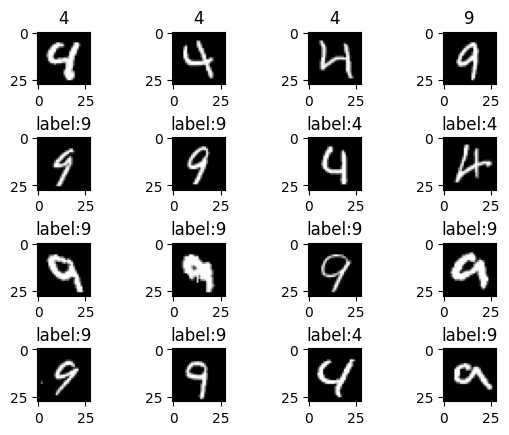

In [26]:
import matplotlib.pyplot as plt
indices = np.argsort(np.abs(clf.decision_function(clf.support_vectors_)))
support_vectors = clf.support_vectors_[indices[-16:]]
id = clf.support_[indices[-16:]]
print(id)
print(train_y[id])
f, axarr = plt.subplots(4, 4)
plt.subplots_adjust(wspace = 0.5, hspace = 1)
for i in range(16):
  if i<=3:
    axarr[0, i].imshow(support_vectors[i].reshape((28,28)), cmap='gray')
    label = 4 if train_y[id[i]] == 0 else 9
    axarr[0, i].set_title(f'{label}')
  else:
    axarr[int(i/4), i%4].imshow(support_vectors[i].reshape((28,28)), cmap='gray')
    label = 4 if train_y[id[i]] == 0 else 9
    axarr[int(i/4), i%4].set_title(f'label:{label}')

plt.show()

These cases indicated the similarity of 4 and 9, which are hardest to classify.